#### CORNEJO GUERRA Emilio

In [ ]:
# In this exercise, we want to explore supervised learning the way we did in class, and build models
# we can run on a micro-controller like the ESP 32. To run this exercise, you will need Python 3.x and
# Jupyter notebook. One way is to use Jupyter online (see at https://jupyter.org), another one is to 
# install Jupyter notebook on your computer, a third way is to install the Anaconda navigator on your computer.
# This third way is of course better suited for those who will want to work further with ML
# (see at https://anaconda.org/anaconda/anaconda-navigator). Choose a way and proceed with Jupyter.
# Note: in Jupyter, 'enter' gets you another line in the same block. "Shift enter" executes the current block.

In [1]:
#First, let's import some libraries we will need for our computation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
#Next, let's import our training set. In your case, the path will be different, modify to match your path to unconv_MV_v5.csv
df = pd.read_csv('./unconv_MV_v5.csv');
df.head(10)

,Vessel,Por,Perm,AI,Brittle,TOC,VR,Prod,Reuse
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,1
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,1
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,1
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,0
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259,0
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989,1
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701,1
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153,1
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122,1


Text(0, 0.5, 'Pressure (Prod)')

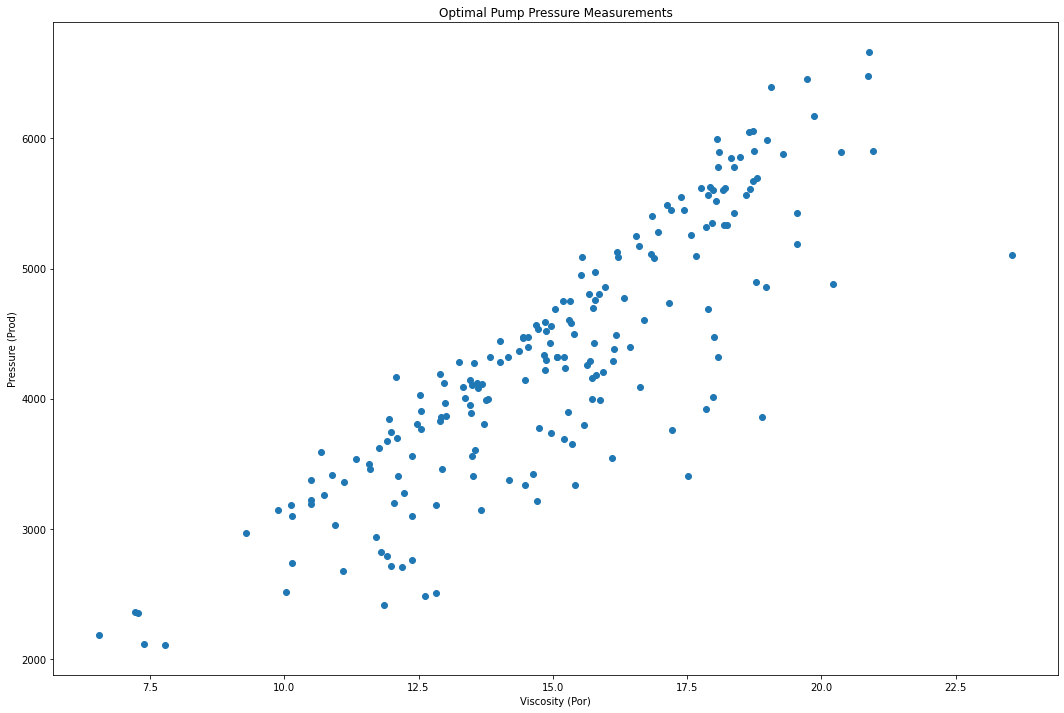

In [7]:
# A good first step is to look at your data, we plot an 18 by 12 figure
plt.figure(figsize=(18,12))
# we plot with the x axis taken from the viscosity, Por, and the y axis taken from the pressure, Prod
plt.plot(df[['Por']], df[['Prod']], 'o')
# And we add caption and legend
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")

In [5]:
#Another good step is to look at your data, the 'df' we created above, head gives us the first 5 lines, but you can 
# put another number, for example df.head(10) would show the first 10 entries
df.head()

,Vessel,Por,Perm,AI,Brittle,TOC,VR,Prod,Reuse
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,1
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,1
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,1
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,0


In [10]:
# Moving into gradient descent. We first create a shorthand notation, x for the viscosity, y for the pressure column 
x = np.array(df[['Por']])
y = np.array(df[['Prod']])
# we also extract the lentgh of these columns, so we can run the loop on all 'n' entries in the columns
n = len(df[['Por']])
# We pick up two initial values for theta0 and theta1. You could use random values, but it is common to start with 0s
th0_curr = th1_curr = 0
# We also need to decide how many times wil will run the loop. It is common to start with something like 1000, then refine later
iterations = 1000
#then, we need to decide by how much we change theta0 and theta1, for now let's use a fixed number, something small
learning_rate = 0.002

In [11]:
# then we run our loop, for the number of iterations we decided above
for i in range(iterations):
    #at each step,  we take the x value, and use our theta0 and theta1 to predict some y value (likely wrong at the beginning)
    y_predicted = th1_curr * x + th0_curr
    #as we need to modify a bit theta0 and theta1 at each step, we calculate (at each step), the derivative of each theta
    dth1 = -(2/n)*sum(x*(y - y_predicted))
    dth0 = -(2/n)*sum(y - y_predicted)
    #then our next theta is going to be changed by the value of the derivative times the learning rate. Think about what happens here:
    # if the derivative is positive (we are going down toward 0, which is our goal, as we reach a minimum when the derivative is 0)
    # then the next value of theta will be a bit smaller than the previous one. If the derivative is negative (we are too low),
    # then the next value of theta will be a bit larger than the previous one (going back up toward 0).
    # At the same time, as the derivative gets closer to 0, we change theta by a smaller and smaller value, to avoid missing the minimum
    th1_curr = th1_curr - learning_rate * dth1
    th0_curr = th0_curr - learning_rate * dth0
    # one good way to see what is going on is to print at each iteration the thetas and the cost
    # if everything works well, then the cost should be going down. So we don't need the cost for the loop itself,
    # but we want to compute it here, just so we can print it and see if it is going down:
    cost = (1/n) * sum ([val**2 for val in (y - y_predicted)])
    print("th1 {}, th0 {}, cost {}, iteration {}".format(th1_curr,th0_curr,cost,i))
    # if the cost is going down too slow, use a larger learning rate. If the cost is not going down, your learning rate is too large
    # Here, try with a learning rate of 0.1 (bounces around the minumum, too large), and 0.0001 (too slow)

th1 [268.63175055], th0 [17.24487941], cost [19565836.12712795], iteration 0
th1 [285.30766932], th0 [18.31238383], cost [326212.75074016], iteration 1
th1 [286.34304491], th0 [18.37565344], cost [252072.94765806], iteration 2
th1 [286.40750985], th0 [18.37658408], cost [251787.24516904], iteration 3
th1 [286.41170401], th0 [18.37364539], cost [251786.13910998], iteration 4
th1 [286.41215673], th0 [18.37046695], cost [251786.12974345], iteration 5
th1 [286.41237717], th0 [18.36727408], cost [251786.12460456], iteration 6
th1 [286.41258316], th0 [18.36408076], cost [251786.11948348], iteration 7
th1 [286.41278823], th0 [18.36088786], cost [251786.114364], iteration 8
th1 [286.41299321], th0 [18.35769543], cost [251786.10924606], iteration 9
th1 [286.41319815], th0 [18.35450349], cost [251786.10412965], iteration 10
th1 [286.41340307], th0 [18.35131202], cost [251786.09901477], iteration 11
th1 [286.41360795], th0 [18.34812103], cost [251786.09390143], iteration 12
th1 [286.41381281], th

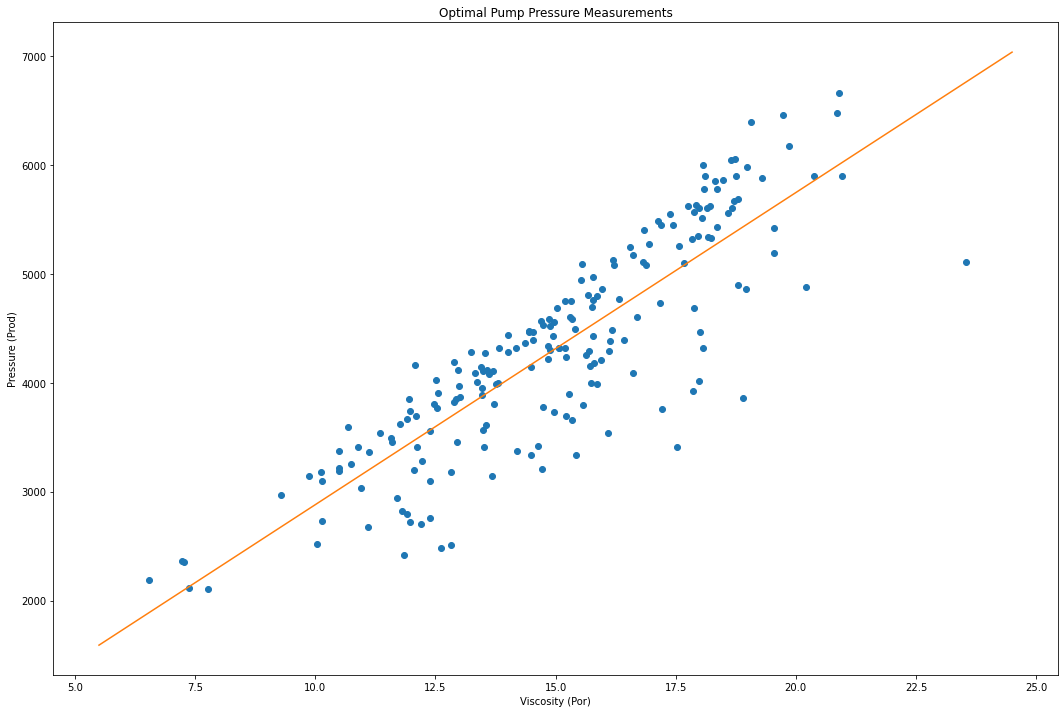

In [12]:
# Let's plot our data again, and overlay there the line we found
# As our x values range from 5 to 25, we just compute two points on the line, one at x=5.5 and the other at x=24.5 (we compute the predicted
# y for each, now that we have our thetas). The below code is ugly, but the goal is to show you what happens, even if you do not master python:
A1 = 5.5
B1 = int(th1_curr * A1 + th0_curr)
A2 = 24.5 
B2 = int(th1_curr * A2 + th0_curr)
P1 = [A1, A2]
P2 = [B1, B2]
# the same figure as before:
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Prod']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")
# adding our line:
plt.plot(P1, P2)

In [13]:
# Now let's automate all this instead, by using scikit learn libraries, in particular the linear model:
from sklearn import linear_model
# let's create a linear regression object
reg = linear_model.LinearRegression()

In [14]:
# then all the training we did above is summarized in a single command, taking as parameters the x and y columns we train against:
reg.fit(df[['Por']],df[['Prod']])

LinearRegression()

C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


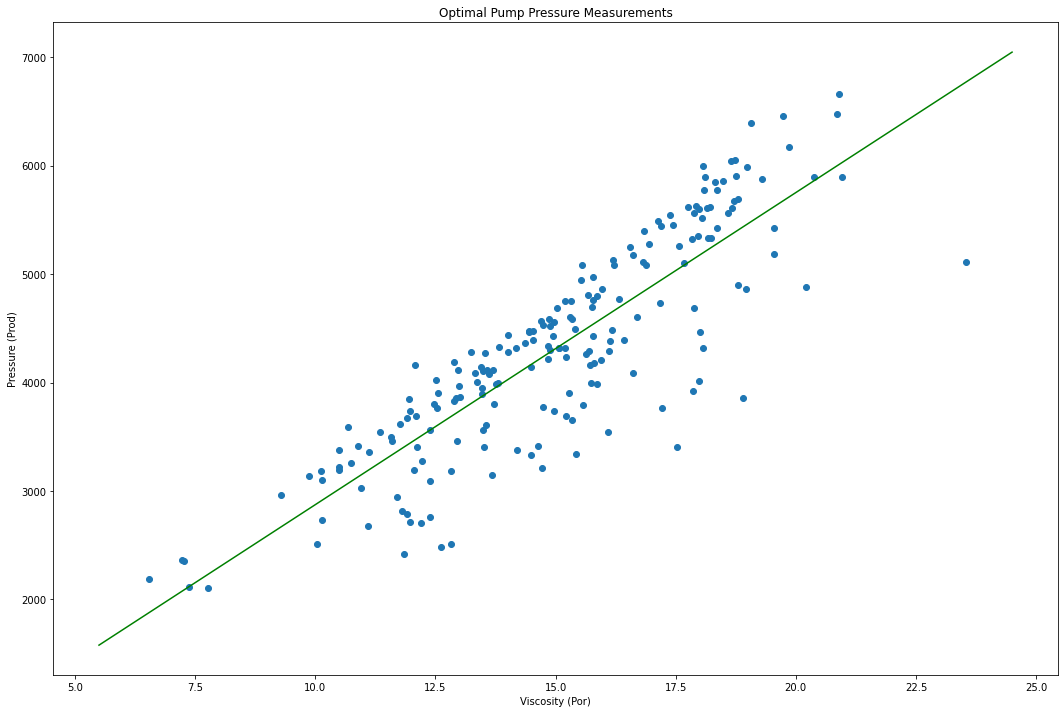

In [15]:
# All done. Let's plot the whole thing again:
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Prod']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")
# adding our predicted line, this time in green (again, there is  a better way, using this heavy handed for clarity):
A3 = 5.5
B3 = int(reg.predict([[A3]]))
A4 = 24.5 
B4 = int(reg.predict([[A4]]))
P3 = [A3, A4]
P4 = [B3, B4]
plt.plot(P3, P4, color = 'green')


In [17]:
# If you want to see the thetas, theta0 is called the intercept, and theta1 is called the coefficient:
int(reg.intercept_), int(reg.coef_)
# 1. What coefficient did you find?

(-2, 287)

### 1. What coefficient did you find?  
When we did the manual exercise, we found after 1000 iterations coefficient 286.60157092, with the automatized method we found the coefficient 287

In [18]:
# Last, if you want to run a prediction, you can use the same 'predict' command, for example suppose a new Por value:
New_Por = 8
#let's predict the presure for that Por:
reg.predict([[New_Por]])
# 2. What predicted value do you find?

C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2299.30151175]])

### 2. What predicted value do you find?
2299.30151175

In [19]:
df.head()

,Vessel,Por,Perm,AI,Brittle,TOC,VR,Prod,Reuse
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,1
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,1
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,1
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,0


Text(0.5, 1.0, 'VR')

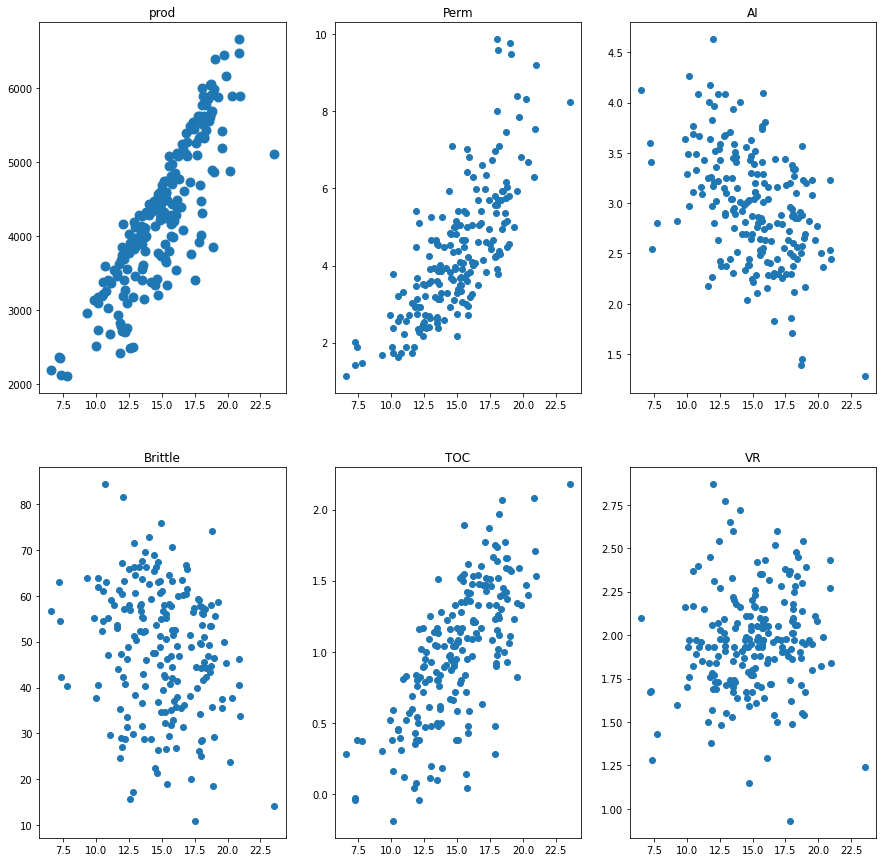

In [22]:
# A good part of ML is trying to understand the data. Por is related to Prod, but it is also related to another parameter.
# Spend some time graphing Por as x against the other columns (as y), you will find one of them that also
# displays a linear relationship with Por. Besides Por (molecular porosity) and Prod (production output)
# that you already know, the set includes Perm (permeability, how well water can mix with the oil), AI
# (accoustic impedance, how well sound traverses the product), Brittle (brittleness of hard particles),
# TOC (total organic carbon), and VR (reflectance).
fig, axs = plt.subplots(2, 3,figsize=(15, 15))
axs[0, 0].scatter(df[['Por']], df[['Prod']],s=80)
axs[0, 0].set_title("prod")

axs[0, 1].scatter(df[['Por']], df[['Perm']])
axs[0, 1].set_title("Perm")

axs[0, 2].scatter(df[['Por']], df[['AI']])
axs[0, 2].set_title("AI")

axs[1, 0].scatter(df[['Por']], df[['Brittle']])
axs[1, 0].set_title("Brittle")

axs[1, 1].scatter(df[['Por']], df[['TOC']])
axs[1, 1].set_title("TOC")

axs[1, 2].scatter(df[['Por']], df[['VR']])
axs[1, 2].set_title("VR")

# 3. Which other linear relationship did you find to Por? Graph it and find the coefficient and the intercept. 

### 3. Which other linear relationship did you find to Por? Graph it and find the coefficient and the intercept.
seeing the other graphs, I can see a linear relationship with Perm and TOC

In [35]:
regPerm = linear_model.LinearRegression()
regTOC = linear_model.LinearRegression()
regPerm.fit(df[['Por']],df[['Perm']])
regTOC.fit(df[['Por']],df[['TOC']])




LinearRegression()

C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


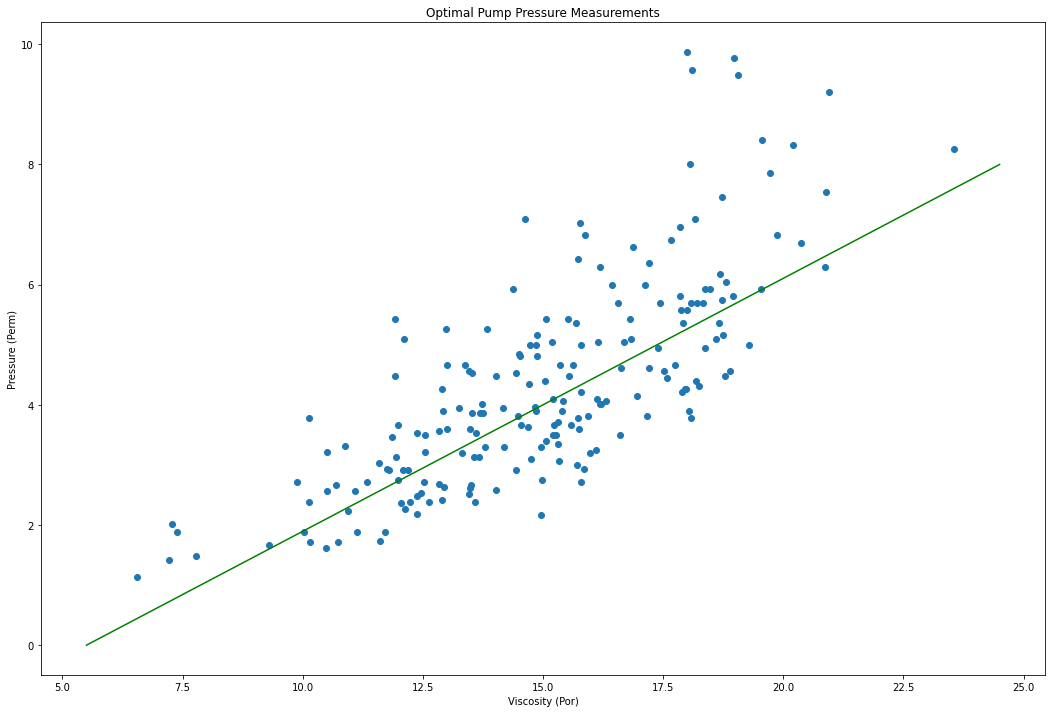

In [26]:
#PERM
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Perm']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("permeability (Perm)")
# adding our predicted line, this time in green (again, there is  a better way, using this heavy handed for clarity):
A3 = 5.5
B3 = int(regPerm.predict([[A3]]))
A4 = 24.5 
B4 = int(regPerm.predict([[A4]]))
P3 = [A3, A4]
P4 = [B3, B4]
plt.plot(P3, P4, color = 'green')


C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


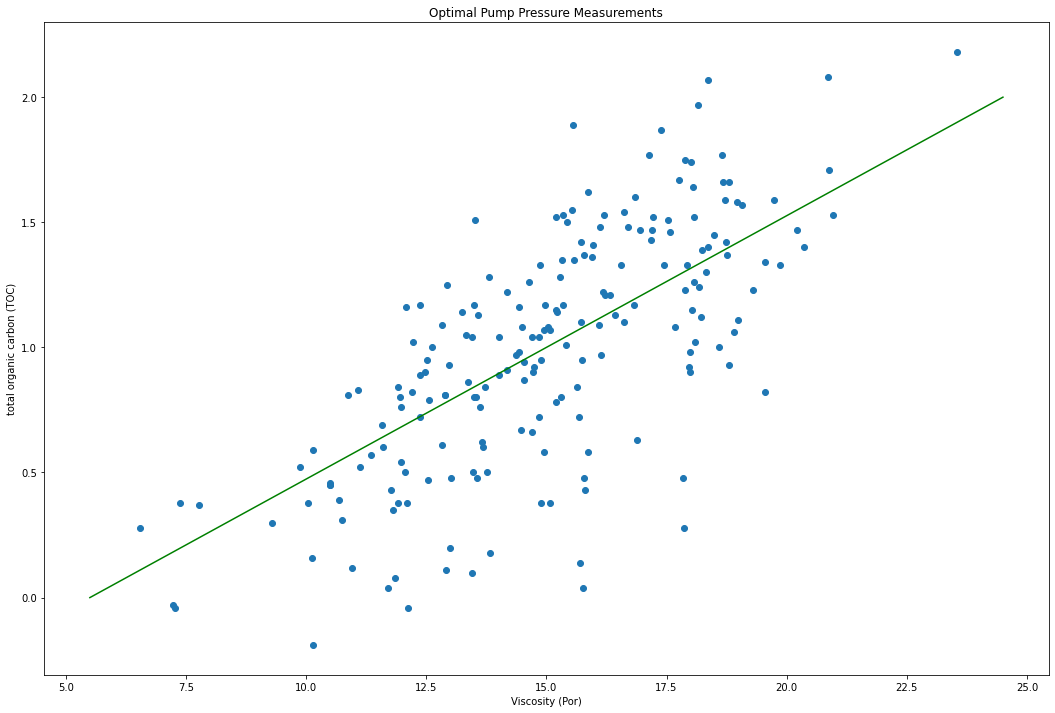

In [34]:
#TOC
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['TOC']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("total organic carbon (TOC)")
# adding our predicted line, this time in green (again, there is  a better way, using this heavy handed for clarity):
A3 = 5.5
B3 = int(regTOC.predict([[A3]]))
A4 = 24.5 
B4 = int(regTOC.predict([[A4]]))
P3 = [A3, A4]
P4 = [B3, B4]
plt.plot(P3, P4, color = 'green')

In [36]:
print("Perm ",(regPerm.intercept_), (regPerm.coef_))
print("TOC ",(regTOC.intercept_), (regTOC.coef_))

Perm  [-2.3117653] [[0.44309578]]
TOC  [-0.73920224] [[0.11537822]]


### 3. Graph it and find the coefficient and the intercept.
Perm: intercept: [-2.3117653], coef: [[0.44309578]]  
TOC: intercept:  [-0.73920224], coef: [[0.11537822]]

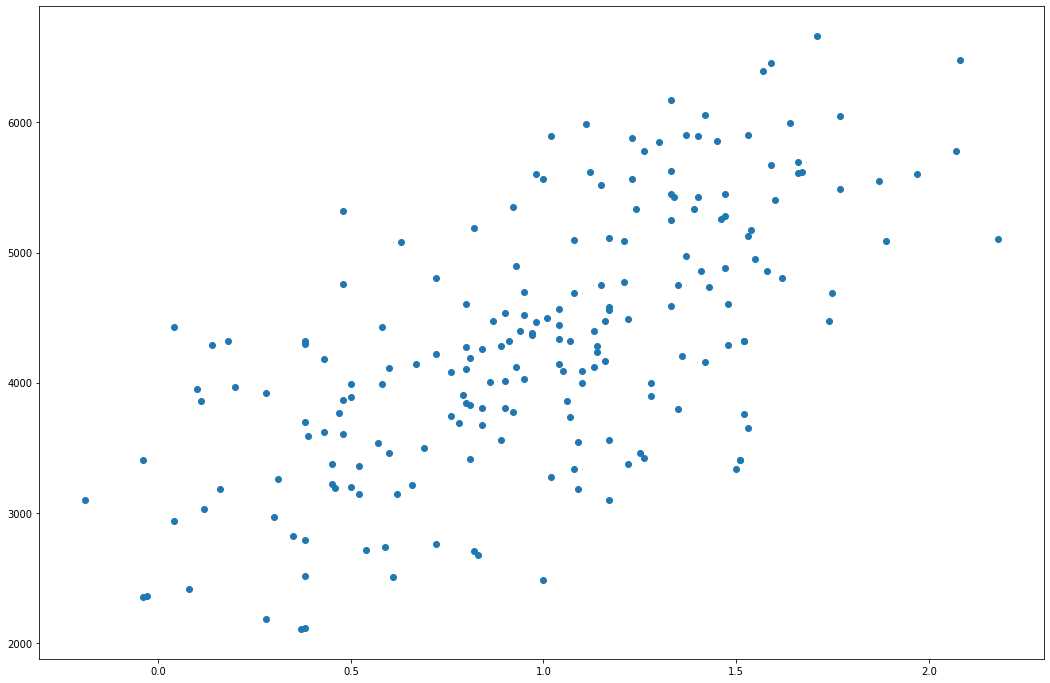

In [37]:
#Now let's try multivariate, also factoring TOC.
plt.figure(figsize=(18,12))
# A fist step is to look at if POC is also linear with Prod
plt.plot(df[['TOC']], df[['Prod']], 'o')

In [38]:
# It is linear, we can thus set our model with 2 variables
reg.fit(df[['Por', 'TOC']],df[['Prod']])

LinearRegression()

In [39]:
#Let's look at our coefficients and intercept:
int(reg.intercept_), reg.coef_
# 4. Which coefficient, intercept did you find?

(123, array([[268.06949486, 170.84028127]]))

### 4. Which coefficient, intercept did you find?
intercept = 123  
coef = [268.06949486, 170.84028127]

C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


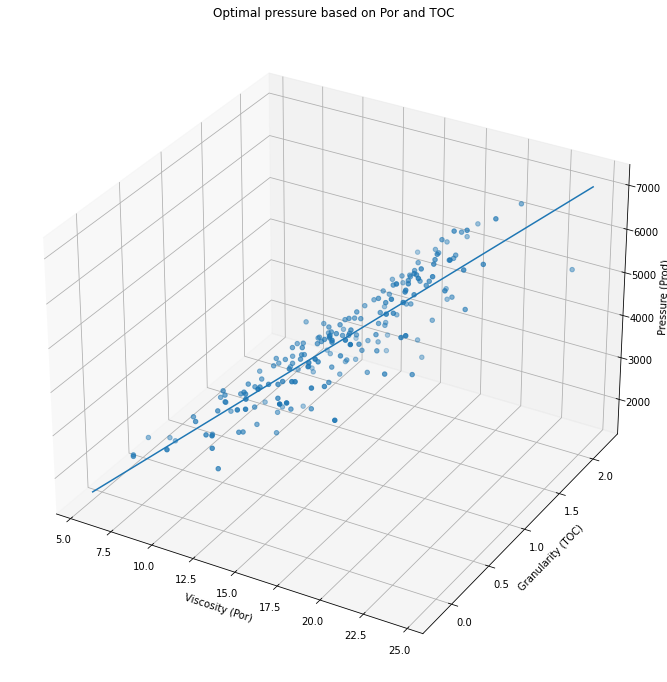

In [40]:
# syntax for 3-D projection
fig1 = plt.figure(figsize=(18,12))
ax = plt.axes(projection ='3d')
ax.scatter(df[['Por']], df[['TOC']], df[['Prod']])
ax.set_title('Optimal pressure based on Por and TOC')
ax.set_xlabel("Viscosity (Por)")
ax.set_ylabel("Granularity (TOC)")
ax.set_zlabel("Pressure (Prod)")
A5 = 5.5
B5 = -0.2
C5 = int(reg.predict([[A5, B5]]))
A6 = 24.5 
B6 = 2.2
C6 = int(reg.predict([[A6, B6]]))
P5 = [A5, A6]
P6 = [B5, B6]
P7 = [C5, C6]
ax.plot(P5, P6, P7)
plt.show()

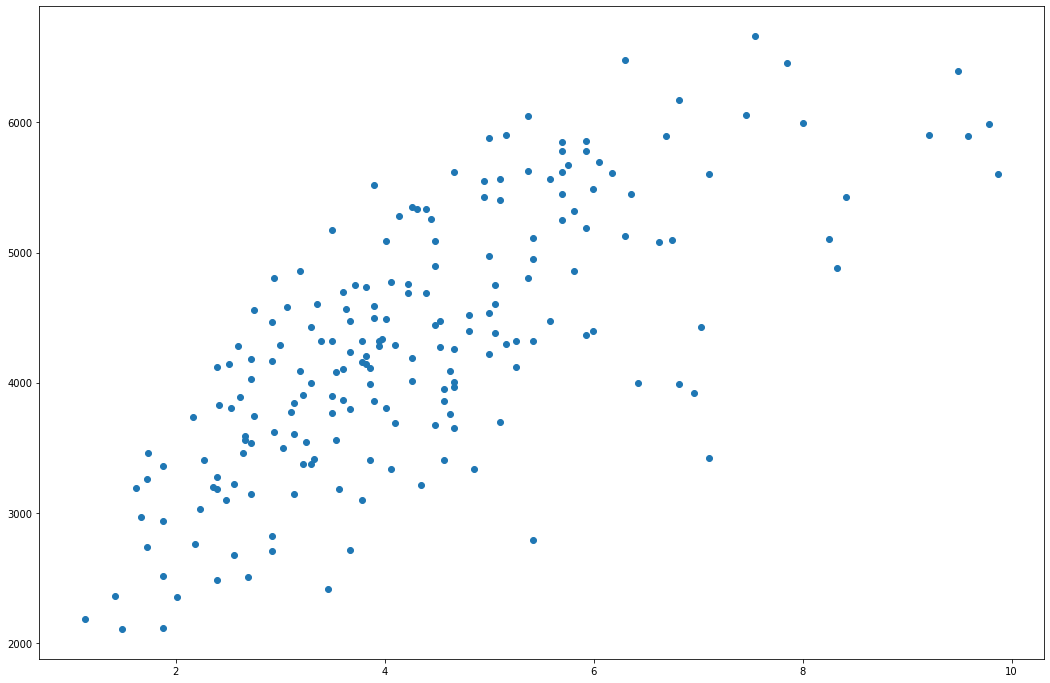

In [41]:
# 5. Reproduce the same process with the other value that you found correlated to Por. Graph the relationship
# What coefficients and intercept did you find?

#Perm.
plt.figure(figsize=(18,12))
plt.plot(df[['Perm']], df[['Prod']], 'o')

223 [[244.46845926  97.74925767]]


C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


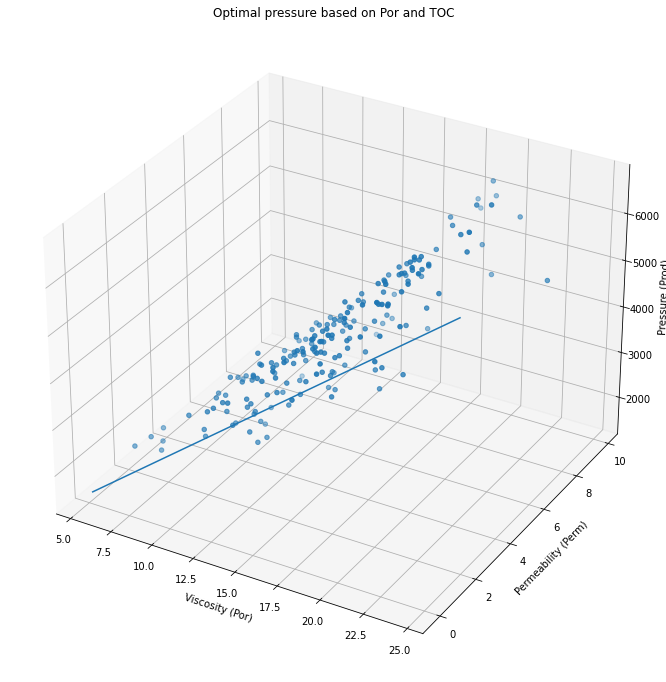

In [43]:
reg.fit(df[['Por', 'Perm']],df[['Prod']])
print(int(reg.intercept_), reg.coef_)
# syntax for 3-D projection
fig1 = plt.figure(figsize=(18,12))
ax = plt.axes(projection ='3d')
ax.scatter(df[['Por']], df[['Perm']], df[['Prod']])
ax.set_title('Optimal pressure based on Por and TOC')
ax.set_xlabel("Viscosity (Por)")
ax.set_ylabel("Permeability (Perm)")
ax.set_zlabel("Pressure (Prod)")
A5 = 5.5
B5 = -0.2
C5 = int(reg.predict([[A5, B5]]))
A6 = 24.5 
B6 = 2.2
C6 = int(reg.predict([[A6, B6]]))
P5 = [A5, A6]
P6 = [B5, B6]
P7 = [C5, C6]
ax.plot(P5, P6, P7)
plt.show()



### 5. Reproduce the same process with the other value that you found correlated to Por. Graph the relationship. What coefficients and intercept did you find?  
Intercept: 223  
coef:  [[244.46845926  97.74925767]]

In [44]:
#Next, you may want to export your model
import joblib
# Save your model to a file - you should see that file in your working directory
joblib.dump(reg, 'my_cool_joblib_model')

['my_cool_joblib_model']

In [45]:
# How big is the model file? If it is 20Kb or less, it should fit onto an ESP 32.
# On your target IoT device running python, you can put that model file, then then load the model. I give it a different name than 'reg'
# so you can see how to call it:
mj = joblib.load('my_cool_joblib_model')

In [46]:
#Then you can use that model to predict values just like before:
mj.predict(([[5.5, -0.2]]))

C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1548.05558579]])

Text(0, 0.5, '1 if pump could be reused, 0 if it was clogged')

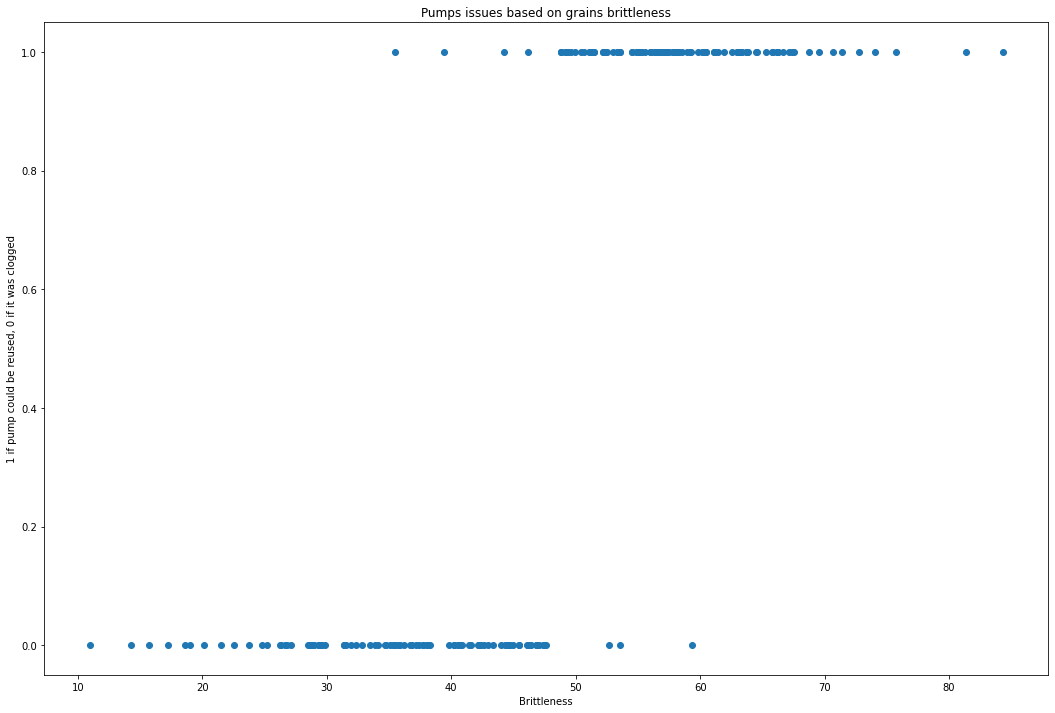

In [47]:
# We can also attempt to run logistic regression on this data. First, let's look at our data:
plt.figure(figsize=(18,12))
plt.plot(df[['Brittle']], df[['Reuse']], 'o')
plt.title("Pumps issues based on grains brittleness")
plt.xlabel("Brittleness")
plt.ylabel("1 if pump could be reused, 0 if it was clogged")

In [48]:
# For linear or logistic regression, it is good practice to split the data between training and test set. 
# Let's first do that, keeping 20% for testing:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['Brittle']], df.Reuse, train_size=0.8)

In [49]:
# Let's do logistic regression. We use directly the sklearn function:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
# Then we apply the function on our data, with the fit call:
model.fit(X_train, Y_train)

LogisticRegression()

In [52]:
# We can look at our theta coefficients:
model.intercept_, model.coef_
# What coefficient and intercept did you find?

(array([-17.86088708]), array([[0.37099764]]))

In [53]:
# We can then look at our test set, and run prediction on it:
X_test

,Brittle
46,63.86
198,58.25
0,81.40
107,38.08
44,44.22
58,26.77
55,55.04
81,41.40
4,10.94
118,40.67


In [56]:
# then you can predict which entries in the test set will be prediected for 1 and for 0.
# 6. How many are prediected for 1, and how many for 0?
model.predict(X_test)


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

#### 6. How many are prediected for 1, and how many for 0?
1 : 21 predictions  
0 : 19 predictions

In [57]:
# We can also look at the probability values, instead of merely looking at the prediction (yes/no) result.
# The ouput displays the probability for 0 in the first column, and the probability for 1 in the second :
model.predict_proba(X_test)
# Is the output coherent with the prediction made above?

array([[2.92648636e-03, 9.97073514e-01],
       [2.29835386e-02, 9.77016461e-01],
       [4.38059972e-06, 9.99995619e-01],
       [9.76644657e-01, 2.33553435e-02],
       [8.10823750e-01, 1.89176250e-01],
       [9.99640084e-01, 3.59915842e-04],
       [7.18359905e-02, 9.28164009e-01],
       [9.24252854e-01, 7.57471457e-02],
       [9.99998987e-01, 1.01342594e-06],
       [9.41166752e-01, 5.88332478e-02],
       [6.56641878e-02, 9.34335812e-01],
       [9.97867854e-01, 2.13214639e-03],
       [6.79773559e-02, 9.32022644e-01],
       [9.99982428e-01, 1.75717391e-05],
       [5.15992213e-02, 9.48400779e-01],
       [4.39350708e-01, 5.60649292e-01],
       [7.66801177e-02, 9.23319882e-01],
       [1.18958883e-01, 8.81041117e-01],
       [9.95064370e-01, 4.93563024e-03],
       [6.14154122e-01, 3.85845878e-01],
       [7.67092009e-01, 2.32907991e-01],
       [1.76911101e-02, 9.82308890e-01],
       [3.58014642e-04, 9.99641985e-01],
       [4.41710425e-02, 9.55828957e-01],
       [9.900622

### Is the output coherent with the prediction made above?  
Yes, it is coherent because when we see the probability is more than 50 %, and we compare with the predictions before, we can see that the prediction was made by the probability

C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\emili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: 

Text(0, 0.5, 'Status (0: clogged, 1: reused)')

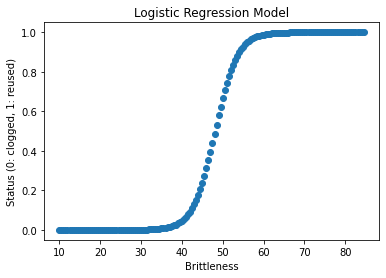

In [58]:
# to illustrate how the prediction works by projecting the probability onto a curve, we can generate
# brittleness values (from 10 to 85, by jumps of 0.5), then plot the prediction:
brittleness = np.arange(10, 85, 0.5)
probabilities= []
for i in brittleness:
    p_clogs = model.predict_proba([[i]])
    probabilities.append(p_clogs[:,1])
plt.scatter(brittleness,probabilities)
plt.title("Logistic Regression Model")
plt.xlabel('Brittleness')
plt.ylabel('Status (0: clogged, 1: reused)')